In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:  # relative_path should be an r-string
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
ref = pickle_load(r'Data\CNN_Data\reflectance_cnn.pkl')

In [5]:
ref = ref.reshape(ref.shape[0] * ref.shape[1], ref.shape[2])

In [9]:
centers = ref.mean(axis=0)
pickle_save(centers, r'Data\CNN_Data\channel_centers.pkl')

In [10]:
pca = PCA(n_components=ref.shape[1], whiten=True)
ref_pca = pca.fit_transform(ref)
pickle_save(pca, r'Data\CNN_Data\Full_PCA\pca_object.pkl')

In [13]:
train = pickle_load(r'Data\CNN_Data\Splits\reflectance_cnn_train.pkl')
val = pickle_load(r'Data\CNN_Data\Splits\reflectance_cnn_val.pkl')
test = pickle_load(r'Data\CNN_Data\Splits\reflectance_cnn_test.pkl')

In [15]:
for split_name, split in zip(['train', 'val', 'test'], [train, val, test]):
    split_flat = split.reshape(
        (split.shape[0] * split.shape[1], split.shape[2])
    )
    split_pca_flat = pca.transform(split_flat)
    split_pca = split.reshape(
        (split.shape[0], split.shape[1], split.shape[2])
    )
    pickle_save(
        split_pca,
        r'Data\CNN_Data\Splits\reflectance_cnn_' + split_name + '_pca244.pkl'
    )

# Kernel PCA

In [6]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='sigmoid')
ref_kpca = kpca.fit(ref[::40, :])
pickle_save(kpca, 'Data\\Split_Data_2\\KPCA\\Sigmoid\\pca_object.pkl')

In [ ]:
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    pickle_save(
        kpca.transform(
            pickle_load(
                f'Data\\Split_Data_2\\List_Data\\reflectance_{num}_list.pkl'
            )
        ),
        f'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_{num}_list.pkl'
    )

In [ ]:
# ref_kpca = kpca.fit_transform(ref)

# saved = 0
# path_template = 'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_(**)_list.pkl'
# for split_num, length in enumerate(lens):
#     pickle_save(
#         ref_pca[saved:saved + length, :8],
#         path_template.replace(
#             '(**)', "0"*(2-len(str(split_num))) + str(split_num)
#         )
#     )
#     saved += length

# Visualization

In [16]:
(
    [(i, sum(pca.explained_variance_ratio_[:i]), pca.explained_variance_ratio_[i-1]) for i in range(1, len(pca.explained_variance_ratio_) + 1)][:]
)

[(1, 0.7286101373529538, 0.7286101373529538),
 (2, 0.9194939236627908, 0.19088378630983704),
 (3, 0.9809315747994207, 0.06143765113662996),
 (4, 0.9935034450177018, 0.012571870218281132),
 (5, 0.995140289157069, 0.0016368441393671892),
 (6, 0.9963334410854461, 0.0011931519283771494),
 (7, 0.9970530235229978, 0.0007195824375517958),
 (8, 0.9976924368611866, 0.0006394133381887241),
 (9, 0.9981989784541686, 0.0005065415929820162),
 (10, 0.99849941080206, 0.0003004323478913769),
 (11, 0.9987501930906995, 0.00025078228863951134),
 (12, 0.9989423633809259, 0.00019217029022642622),
 (13, 0.9991026482245173, 0.00016028484359145286),
 (14, 0.9992344081944406, 0.00013175996992335247),
 (15, 0.9993485784270214, 0.00011417023258080565),
 (16, 0.9994388350548674, 9.025662784597612e-05),
 (17, 0.9995067603211772, 6.792526630986894e-05),
 (18, 0.9995622367410162, 5.5476419838953705e-05),
 (19, 0.99961388116001, 5.164441899381881e-05),
 (20, 0.9996562521729128, 4.237101290273525e-05),
 (21, 0.99969019

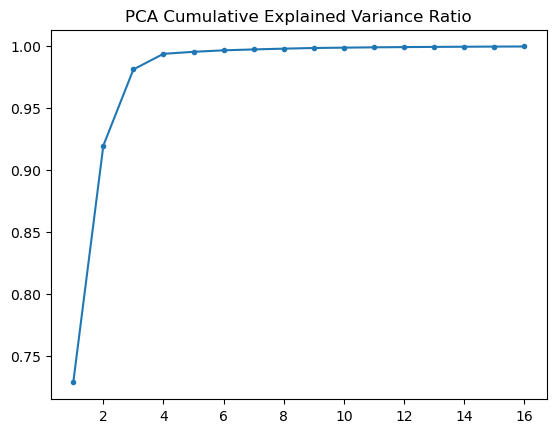

In [17]:
fig, ax = plt.subplots()
ax.set_title('PCA Cumulative Explained Variance Ratio')
ax.plot(
    [i for i in range(1, len(pca.explained_variance_ratio_) + 1)][:16],
    [sum(pca.explained_variance_ratio_[:i])
        for i in range(1, len(pca.explained_variance_ratio_) + 1)
    ][:16],
    marker='.'
)

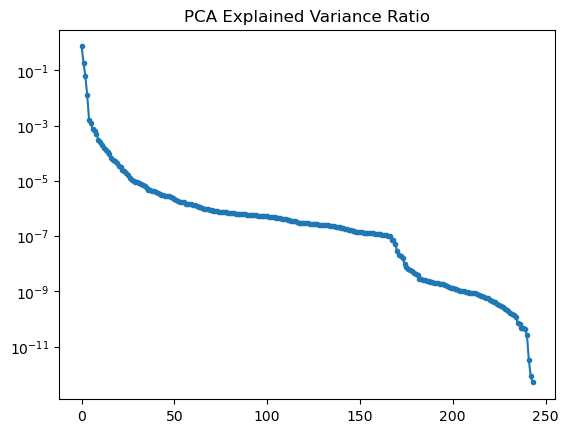

In [18]:
fig, ax = plt.subplots()
ax.set_title('PCA Explained Variance Ratio')
ax.semilogy(pca.explained_variance_ratio_, marker='.')

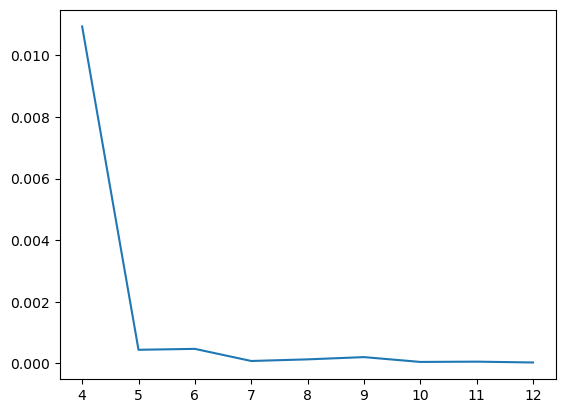

In [20]:
plt.plot(np.arange(4,13),
    (
        np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(0,len(pca.explained_variance_ratio_))
            ]
        )[:-1]
        - np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(1,len(pca.explained_variance_ratio_))
            ]
        )
    )[3:12]
)

In [13]:
import pandas as pd

pd.DataFrame(
    {
        'Number of Components' : np.arange(1, 245),
        'Cumulative Explained Variance Ratio' : [
                sum(pca.explained_variance_ratio_[:i])
                for i in range(1,len(pca.explained_variance_ratio_) + 1)
        ],
        'Explained Variance Ratio' : pca.explained_variance_ratio_,
    }
).to_csv(join_path('Data\\Split_Data_3\\Full_PCA\\Explained_Variance.csv'))

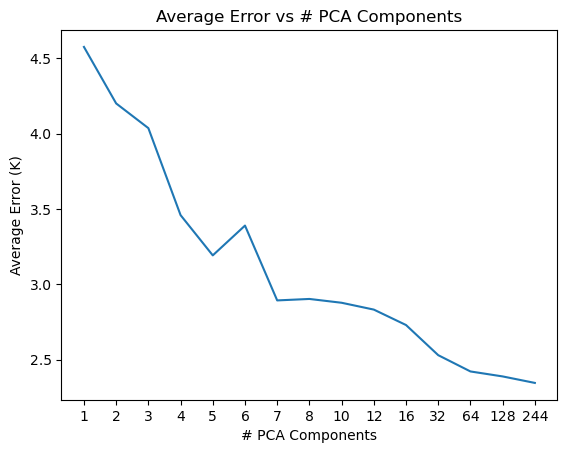

In [27]:
n = [1,2,3,4,5,6,7,8,10,12,16,32,64,128,244]
w = 11.863*np.sqrt(
    [
        .1488,.1254,.1158,.08504,.07241,.08166,.05948,
        .05988,.05884,.057,.05295,.04547,.04167,.04054,.03909
    ]
)
fig, ax = plt.subplots()
ax.set_title('Average Error vs # PCA Components')
ax.plot(np.arange(1,len(n)+1),w)
ax.set_xlabel('# PCA Components')
ax.set_ylabel('Average Error (K)')
ax.set_xticks(np.arange(1,len(n)+1))
ax.set_xticklabels(n)
plt.show(fig)